# Тема проекта:

**Клиентам оператора стовой связи предложены два тарифных плана: «Смарт» и «Ультра». 
Наша задача —  сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 клиентов оператора: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.**

## План проекта:


1. Изучение данных
    - загрузка библиотек, датасэтов
    - проверка на пропуски, дубликаты, ошибки
2. Подготовка данных
    - изменение форматов данных, группировка по месяцам, сведение таблиц
3. Расчет необходимых параметров
    - выручка для каждого клиента
4. Построение графиков и промежуточные выводы
    - гистограммы для исследуемых переменных
    - среднее, дисперсия, стандартное отклонение
    - промежуточные выводы
5. Проверка гипотез
    - средняя выручка пользователей тарифов «Смарт» и «Ультра» различается
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
6. Общие выводы

### 1. Изучение данных

Загружаем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

pd.options.mode.chained_assignment = None

Загружаем данные

In [2]:
zvon = pd.read_csv('/datasets/calls.csv')
traf = pd.read_csv('/datasets/internet.csv')
mess = pd.read_csv('/datasets/messages.csv')
user = pd.read_csv('/datasets/users.csv')

Проверим на предмет пропусков, дубликатов, а так же ознакомимся с типами данных

**1.1. Звонки**

In [3]:
zvon.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
zvon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
zvon.duplicated().sum()

0

Данные по звонкам не имеют пропусков и дубликатов, имеется лишний столбец `id` и стоит изменить тип данных столбца даты.

**1.2. Трафик**

In [6]:
traf.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
traf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
traf.duplicated().sum()

0

Данные по трафику не имеют пропусков и дубликатов, имеются лишние столбцы `id` и `Unnamed: 0`, так же стоит изменить тип данных столбца даты.

**1.3. Сообщения**

In [9]:
mess.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
mess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
mess.duplicated().sum()

0

Данные по сообщениям не имеют пропусков и дубликатов, имеется лишний столбец `id`, аналогичное наблюдение по столбцу даты

**1.4. Клиенты**

In [12]:
user.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [13]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [14]:
user.duplicated().sum()

0

Таблица с данными клиентов имеет пропуски в столбце даты прекращения пользования тарифом, но нет необходимости чем-то их заполнять. Забегая вперед - из этой таблицы нам потребуются только данные столбцов user_id  и city, так что не имеет смысла что-то в ней менять. 

Выделим столбцы `user_id` и `city` в отдельный датафрейм.

In [15]:
city = user[['user_id', 'city']]

### 2. Подготовка данных

**2.1. Звонки**

In [16]:
#изменяем формат даты
zvon['call_date'] = pd.to_datetime(zvon['call_date'], format = '%Y-%m-%d')
#добавляем столбец с месяцем
zvon['month'] = zvon['call_date'].dt.strftime('%b')
#строим сводную таблицу 
zvon_svod = zvon.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = ['sum'])
#переводим таблицу к формату обычного датафрейма
zvon_svod.columns = zvon_svod.columns.droplevel(0) 
zvon_svod = zvon_svod.reset_index().rename_axis(None, axis=1)
zvon_svod.columns = ['user_id', 'month','minutes_used']

In [17]:
zvon_svod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 3 columns):
user_id         3174 non-null int64
month           3174 non-null object
minutes_used    3174 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 74.5+ KB


Аналогичные операции проводим для интернета и сообщений.

**2.2. Интернет**

In [18]:
#перевод даты в формат даты
traf['session_date'] = pd.to_datetime(traf['session_date'], format = '%Y-%m-%d')
#добавление столбца месяца, по которому будем группировать
traf['month'] = traf['session_date'].dt.strftime('%b')
#удалим ненужные столбцы
traf = traf.drop(['Unnamed: 0' , 'id'] , axis='columns')
#получаем сводную таблицу трафика для каждого пользователя на каждый месяц
traf_svod = traf.pivot_table(index = ['user_id','month'], values = 'mb_used', aggfunc = 'sum')
#приводим ее к обычному датафрейму
traf_svod = traf_svod.reset_index().rename_axis(None, axis=1)
traf_svod.columns = ['user_id', 'month', 'mb_used']

In [19]:
traf_svod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
user_id    3203 non-null int64
month      3203 non-null object
mb_used    3203 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 75.2+ KB


**2.3. Сообщения**

In [20]:
#форматирование даты
mess['message_date'] = pd.to_datetime(mess['message_date'], format = '%Y-%m-%d')
#добавляем столбец месяца
mess['month'] = mess['message_date'].dt.strftime('%b')
#удаляем ненужный столбец
mess = mess.drop('id', axis = 'columns')
#строим сводную таблицу
mess_svod = mess.pivot_table(index = ['user_id','month'], values = 'user_id', aggfunc = ['count'])
#переводим таблицу к формату обычного датафрейма
mess_svod.columns = mess_svod.columns.droplevel(0)
mess_svod = mess_svod.reset_index().rename_axis(None, axis=1)
mess_svod.columns = ['user_id', 'month', 'mess_count']

In [21]:
mess_svod.head(5)

,user_id,month,mess_count
0,1000,Aug,81
1,1000,Dec,70
2,1000,Jul,75
3,1000,Jun,60
4,1000,May,22


Получили необходимые для дальгейшего анализа таблицы

**2.4. Объединение таблиц**

Соединим таблицы для трафика, звонков и сообщений

In [22]:
total_svod_fin = traf_svod.merge(zvon_svod, how = 'outer', on = ['user_id', 'month'])
total_svod_fin = total_svod_fin.merge(mess_svod, how = 'outer', on = ['user_id', 'month'])

In [23]:
total_svod_fin.head(5)

,user_id,month,mb_used,minutes_used,mess_count
0,1000,Aug,14055.93,389.87,81.0
1,1000,Dec,9817.61,312.98,70.0
2,1000,Jul,14003.64,318.80,75.0
3,1000,Jun,23233.77,158.90,60.0
4,1000,May,2253.49,150.06,22.0


Добавим столбец с указанием тарифа клиента

In [24]:
users = pd.read_csv('/datasets/users.csv')
users_tarifs = users[['user_id', 'tariff']]
total_svod_fin = total_svod_fin.merge(users_tarifs, how = 'left', on = 'user_id')

In [25]:
total_svod_fin.head(5)

,user_id,month,mb_used,minutes_used,mess_count,tariff
0,1000,Aug,14055.93,389.87,81.0,ultra
1,1000,Dec,9817.61,312.98,70.0,ultra
2,1000,Jul,14003.64,318.80,75.0,ultra
3,1000,Jun,23233.77,158.90,60.0,ultra
4,1000,May,2253.49,150.06,22.0,ultra


In [26]:
total_svod_fin.isna().sum()

user_id           0
month             0
mb_used          11
minutes_used     40
mess_count      497
tariff            0
dtype: int64

Пропуски в стобцах логично заполнить нулями.

In [27]:
total_svod_fin = total_svod_fin.fillna(0)

Из общей таблицы получим две для разных тарифов

In [28]:
smart = total_svod_fin[total_svod_fin['tariff'] == 'smart']
ultra = total_svod_fin[total_svod_fin['tariff'] == 'ultra']

Проверим, сходятся ли переменные в разных таблицах

In [29]:
print('Сумма сообщений в исходной таблице: ',mess_svod['mess_count'].sum())
print()
print('Сумма сообщений по общей таблице: ', total_svod_fin['mess_count'].sum())
print()
print('Сумма сообщений по таблице smart и ultra: ', (smart['mess_count'].sum() + ultra['mess_count'].sum()))

Сумма сообщений в исходной таблице:  123036

Сумма сообщений по общей таблице:  123036.0

Сумма сообщений по таблице smart и ultra:  123036.0


### 3. Расчет необходимых параметров.

Для дальнейших расчетов нам понадобится таблица с ценами тарифов

In [30]:
tar = pd.read_csv('/datasets/tariffs.csv')
tar

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**3.1. Выручка тарифа Smart**

In [31]:
#посчитаем трафик,минуты и сообщения сверх тарифа
smart['traff_over'] = (smart['mb_used'] - 15360)/1024
smart['min_over'] = smart['minutes_used'] - 500
smart['mess_over'] = smart['mess_count'] - 50

In [32]:
smart.head(5)

,user_id,month,mb_used,minutes_used,mess_count,tariff,traff_over,min_over,mess_over
8,1001,Dec,14036.66,391.34,0.0,smart,-1.292324,-108.66,-50.0
9,1001,Nov,18429.34,408.12,0.0,smart,2.997402,-91.88,-50.0
10,1002,Aug,20319.26,269.71,13.0,smart,4.843027,-230.29,-37.0
11,1002,Dec,18113.73,222.98,12.0,smart,2.689189,-277.02,-38.0
12,1002,Jul,17580.10,204.75,11.0,smart,2.168066,-295.25,-39.0


In [33]:
#отрицательные значения говорят о том, что клиент уложился в предоставленный объем, заменяем эти значения на ноль
list = ['traff_over', 'min_over','mess_over']
smart[list] = smart[list].where(smart[list] > 0, 0)
#а остатки округляем до целого в сторону большего
smart[list] = np.ceil(smart[list])

In [34]:
#посчитаем прибыль с каждого клиента по месяцам
smart['rev'] = smart['traff_over']*200 + smart['min_over']*3 + smart['mess_over']*3 + 550
#удалим ненужные более столбцы
smart = smart.drop(['traff_over' , 'min_over', 'mess_over'] , axis='columns')

In [35]:
smart.head(5)

,user_id,month,mb_used,minutes_used,mess_count,tariff,rev
8,1001,Dec,14036.66,391.34,0.0,smart,550.0
9,1001,Nov,18429.34,408.12,0.0,smart,1150.0
10,1002,Aug,20319.26,269.71,13.0,smart,1550.0
11,1002,Dec,18113.73,222.98,12.0,smart,1150.0
12,1002,Jul,17580.10,204.75,11.0,smart,1150.0


**3.2. Выручка тарифа Ultra**

In [36]:
ultra['traff_over'] = (ultra['mb_used'] - 30720)/1024
ultra['min_over'] = ultra['minutes_used'] - 3000
ultra['mess_over'] = ultra['mess_count'] - 1000

In [37]:
#отрицательные значения говорят о том, что клиент уложился в предоставленный объем, заменяем эти значения на ноль
ultra[list] = ultra[list].where(ultra[list] > 0, 0)
#а остатки округляем до целого в сторону большего
ultra[list] = np.ceil(ultra[list])

In [38]:
#посчитаем прибыль с каждого клиента по месяцам
ultra['rev'] = ultra['traff_over']*150 + ultra['min_over']*1 + ultra['mess_over']*1 + 1950
#удалим ненужные более столбцы
ultra = ultra.drop(['traff_over' , 'min_over', 'mess_over'] , axis='columns')

In [39]:
ultra.head(5)

,user_id,month,mb_used,minutes_used,mess_count,tariff,rev
0,1000,Aug,14055.93,389.87,81.0,ultra,1950.0
1,1000,Dec,9817.61,312.98,70.0,ultra,1950.0
2,1000,Jul,14003.64,318.80,75.0,ultra,1950.0
3,1000,Jun,23233.77,158.90,60.0,ultra,1950.0
4,1000,May,2253.49,150.06,22.0,ultra,1950.0


### 4. Построение графиков и промежуточные выводы.

**4.1. Тариф Smart**

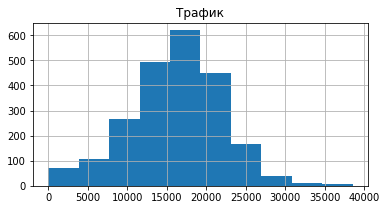

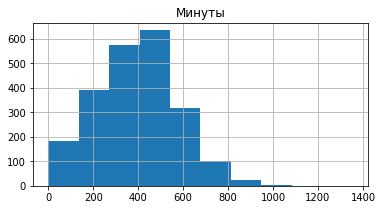

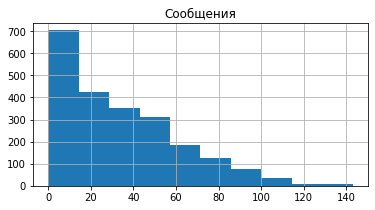

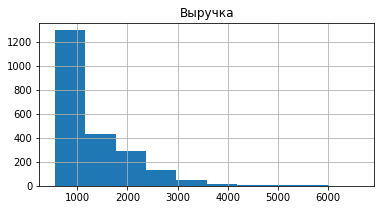

In [40]:
table = smart[['mb_used', 'minutes_used', 'mess_count', 'rev']]
columns = ['Трафик', 'Минуты', 'Сообщения', 'Выручка']

for name,column in zip(table,columns):
    smart.hist(name ,figsize = (6,3))
    plt.title(column)

In [41]:
print('Тариф Смарт')
print()
for row,name in zip(table, columns):
  print(name)
  print('Среднее значение:', smart[row].mean())
  print('Дисперсия:', np.var(smart[row]))
  print('Стандартное отклонение:', smart[row].std())
  print()

Тариф Смарт

Трафик
Среднее значение: 16208.386989681472
Дисперсия: 34447035.49528492
Стандартное отклонение: 5870.476681049198

Минуты
Среднее значение: 394.42702557200545
Дисперсия: 32371.866415692934
Стандартное отклонение: 179.96220708447686

Сообщения
Среднее значение: 33.384028712427096
Дисперсия: 796.4554829170761
Стандартное отклонение: 28.22787555676141

Выручка
Среднее значение: 1257.5886047554957
Дисперсия: 641178.0151415706
Стандартное отклонение: 800.9155991835295



*Выводы по тарифу Смарт*

- По минутам и сообщениям нет каких-то интересных замечаний, очень малая часть клиентов выходит за рамки, предоставленных минут/сообщений на месяц
- Отчетливо видно, что очень большому количеству клиентов не хватает предоставленного трафика, а сильные переплаты и нежелание переходить на тариф Ультра могу спровоцировать на переход к другому оператору.
- Средняя выручка в два раза выше абонентской платы так же говорит об ощутимых переплатах, причиной переплаты является высокая цена на дополнительные гигабайты, которые имеют место быть для клиентов данного тарифа.

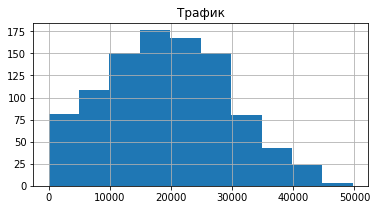

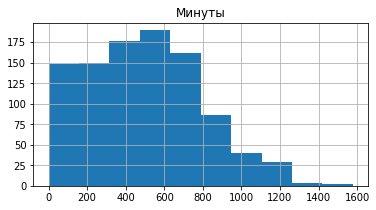

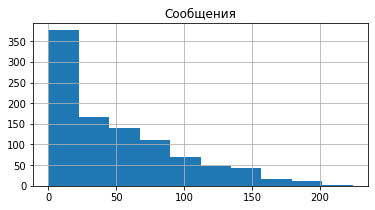

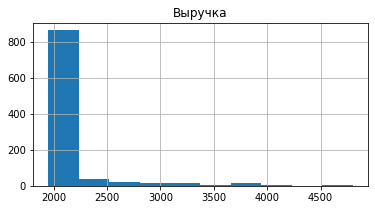

In [42]:
for name,column in zip(table,columns):
    ultra.hist(name ,figsize = (6,3))
    plt.title(column)

In [43]:
print('Тариф Ультра')
print()
for row,name in zip(table, columns):
  print(name)
  print('Среднее значение:', ultra[row].mean())
  print('Дисперсия:', np.var(ultra[row]))
  print('Стандартное отклонение:', ultra[row].std())
  print()

Тариф Ультра

Трафик
Среднее значение: 19468.805208121827
Дисперсия: 101647713.26174639
Стандартное отклонение: 10087.170752166034

Минуты
Среднее значение: 497.06822335025385
Дисперсия: 89851.18818638667
Стандартное отклонение: 299.9041519710971

Сообщения
Среднее значение: 49.36345177664975
Дисперсия: 2282.946075394882
Стандартное отклонение: 47.804457350174715

Выручка
Среднее значение: 2070.1522842639592
Дисперсия: 141373.07325620344
Стандартное отклонение: 376.1871144505328



*Выводы по тарифу Ультра*

- Абсолютное большинство укладывается объем услуг, предоставляемых каждый месяц, о чем свидетельствет выручка, почти, равная абонентской плате.

*Итоговый вывод по тарифам Смарт и Ультра*



- мобильный интернет популярен среди пользователей обоих тарифов, но больше половины пользователей тарифа Смарт не укладываются в предоставленные 15Гб
- миннуты имеют меньшую популярность, и большинству хватает объема минут, предоставленных тарифами
- как и ожидалось, сообщениями пользуются очень мало, хотя в тарифе Смарт встречаются клиенты, кому не хватает 50 сообщений в месяц
- помесячная выручка с клиентов тарифа Ультра в подавляющем большинстве случаев равна абонентской плате, чего неьзя сказать о выручке с пользователей тарифа Смарт, которая характеризуется гораздо большим стандартным отклонением в соотношении с тарифом Ультра

### 5. Проверка гипотез

**5.1.  Различная выручка тарифов**

Нулевая гипотеза: `Средняя выручка тарифа Смарт равна средней выручке тарифа Ультра`

Т.к. значений в выборке достаточно много можем принять уровень статистической значимости 5%

In [44]:
results = st.ttest_ind(
    smart['rev'], 
    ultra['rev'],
    equal_var = False)
print('p-значение:', results.pvalue)

alpha = .05

if ((results.pvalue) < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 6.179723168443785e-274
Отвергаем нулевую гипотезу


*Исходя из результатов теста средние выручки тариффов не могут быть равны.*

Альтернативная гипотеза: `Средняя выручка тарифа Смарт не равна средней выручке тарифа Ультра`

In [68]:
results = st.ttest_1samp(
    smart['rev'], 
    ultra['rev'].mean())
print('p - значение:', (results.pvalue/2))

alpha = .05

if ((results.pvalue/2) < alpha) and (smart['rev'].mean()>ultra['rev'].mean()):
    print("Отвергаем алтернативную гипотезу")
else:
    print("Не получилось отвергнуть альтернативную гипотезу")

p - значение: 0.0
Не получилось отвергнуть альтернативную гипотезу


*Альтернативная гипотеза подтверждает результаты предыдущего теста.*

**5.2.  Различная выручка с клиентов из Москвы и клиентов из других городов**

Объединим датафреймы двух тарифов и добавим к ним данные о городе.

In [46]:
smart_ultra = smart.merge(ultra, how = 'outer')
smart_ultra_city = smart_ultra.merge(city, how = 'left', on ='user_id')

Проверим, совпадает ли сумма выручки

In [47]:
smart_ultra_city['rev'].sum()

4842265.0

In [48]:
smart['rev'].sum() + ultra['rev'].sum()

4842265.0

Выделим два датасета: для Москвы и остальных городов

In [49]:
moscow = smart_ultra_city[smart_ultra_city['city'] == 'Москва']
other = smart_ultra_city[smart_ultra_city['city'] != 'Москва']

Проверим сумму

In [50]:
moscow['rev'].sum() + other['rev'].sum()

4842265.0

Сформулируем нулевую гипотезу: `Средняя выручка по клиентам из Москвы равна средней выруке по клиентам из других городов`

In [51]:
results = st.ttest_ind(
    moscow['rev'], 
    other['rev'],
    equal_var = False)
print('p-значение:', results.pvalue)

alpha = .05

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.46532858228722906
Не получилось отвергнуть нулевую гипотезу


*С вероятностью 46% выручки совпадают, что говорит о схожем поведении клиентов из Москвы и других городов.*

Альтернативная гипотеза: `Средняя выручка по клиентам из Москвы меньше средней выруки по клиентам из других городов`

In [67]:
results = st.ttest_1samp(
    other['rev'], 
    moscow['rev'].mean())
print('p/2 - значение:', (results.pvalue/2))

alpha = .05

if ((results.pvalue/2) < alpha) and (moscow['rev'].mean()<other['rev'].mean()):
    print("Отвергаем алтернативную гипотезу")
else:
    print("Не получилось отвергнуть альтернативную гипотезу") 

p/2 - значение: 0.05628209282831281
Не получилось отвергнуть альтернативную гипотезу


*Чуть более чем в 5% случаев средняя выручка по клиентам из других городов превышает среднюю выручку по клиентам из Москвы, что не позволяет отвергнуть альтернативную гипотезу, по крайней мере при заданном уровне статистической значимости.*

### 6. Общие выводы

- Нами были исследованы предоставленные данные о клиентах оператора мобильной связи. Клиентам предоставляются два тарифа, имеющих отличия в абонентской плате, предоставляемых услугах (минуты, гигабайты, сообщения), цене дополнительных услуг.
- Данные были предобработаны для последующего анализа, а именно: удалены (скорее всего) ошибочные данные, изменены форматы данных (в данном случае только дата), добавлены необходимые для анализа переменные (помесячная выручка для каждого клиента)
- Построенны гистограммы для услуг для каждого тарифа, а так же посчитаны среднее, стандартное отклонение и дисперсия, на основании чего были сделаны следующие выводы:
    - минуты, как и сообщения не так востребованы как гигабайты интернета, и большинству клиентов тарифа Ультра вполне хватает этого объема, чего нельзя сказать о клиентах тарифа Смарт, в случае которого около четверти клиентов приобретает дополнительные услуги
    - мобильный интернет крайне популярен среди клиентов двух тарифов, но дополнительные гигабайты более характерны для тарифа Смарт. 
    - средняя выручка тарифа Ультра очень близка к абонентской плате, для тарифа Смарт - она превышает абонентскую плату более чем в два раза и характеризуется значительно большей дисперсией.
- Были проверены гипотезы о различной выручке тарифов и о разном поведении абонентов из Москвы и других городов. Получены следующие результаты:
    - Вероятность совпадения выручки для тарифов крайне мала
    - Клиенты из Москвы имеют схожее поведение с клиентами из других городов, что довольно логично, ведь как и в Москве число людей согласных на абонентскую плату тарифа Ультра значительно меньше чем для тарифа Смарт.
    
*Личные рекомендации:*
    **Учитывая внушительные, по сравнению с абонентской платой, переплаты клиентов тарифа Смарт и минимальные переплаты абонентов тарифа Ультра - я бы предложил введение промежуточного тарифа, с упором на мобильный интернет. Возможно, это несколько снизит выручку с клиентов, но минимизирует риски оттока клиентов к другим операторам. Тарифы Смарт и Ультра я бы предложил оставить без изменений.**